# Introduction to Object Detection with `PyTorch`.


**📑 Timeline:**
1. [Object Detection]().
2. [Recognition of semantic category]().
3. [The Metholodogy of Object Detection *(a step by step guide)*]().
4. [The `R-CNN` Method *(Region-Based CNN)*]().
5. [`RetinaNet`]().
6. [`FCOS` Method]().
7. [`PyTorch` fine-tunning a pretrained `Fast R-CNN` detector for a multiple object detection paradigm]().
8. [Overall Sum Up and further explanation]().


---

## [1. What is Object Detection?]()

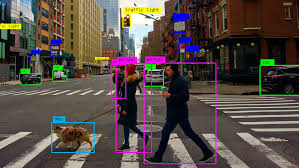

`Object Detection` is a core task in `Computer Vision` that involves **identifying and locating objects** within an image or a video frame. Unlike image classification, which only determines what is present in an image (i.e., assigning a label to the entire image), object detection goes further by **not only identifying the types of objects in the image but also determining their specific locations**. This is typically achieved by drawing a `bounding box` around each detected object and associating it with a specific class label.

In practical terms, object detection is used in a wide range of applications, such as autonomous driving (detecting vehicles, pedestrians, and obstacles), surveillance systems (identifying and tracking individuals), and even in retail (detecting products on shelves).

### The `Goal` of Object Detection.
The primary goal of object detection is to simultaneously solve two problems:
1. `Classification`: Identifying the category or class of each object within the image (e.g., dog, cat, car).
2. `Localization`: Determining the precise location of each object, usually represented by a rectangular bounding box.

#### **How It Works?**
Object detection typically involves several steps to process an image and identify objects. Let's explain the four main steps and in the continuation of the tutorial we will thoroughly analyze all the steps of `OD` and exactly how it works. So, let's explain the basics:

1. `Input Image Processing`: The image is first preprocessed, which may involve resizing, normalization, or other transformations to ensure it is in the correct format for the detection model.
2. `Object Proposal Generation`: The detection algorithm scans the image to propose regions that are likely to contain objects. This can be done using techniques like `sliding windows` or more sophisticated methods like `region proposal networks (RPNs)` in two-stage detectors.
3. `Classification and Localization`: For each proposed region, the algorithm determines whether an object is present and, if so, classifies the object and refines the bounding box coordinates.
4. `Post-Processing`: Finally, the algorithm may perform additional processing, such as `non-maximum suppression (NMS)`, to remove duplicate detections and refine the bounding boxes.

### What is a `Bounding Box?`

A `bounding box` **is a rectangular box that is drawn around an object in an image to specify its location**. The `bounding box` **is defined by its *top-left* and *bottom-right* corners**(or alternatively, by its center, width, and height). This simple geometric shape helps in isolating and highlighting the object of interest within an image, making it easier to classify and analyze.

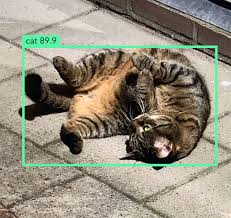

For instance, if you have an image of a dog, a `bounding box` would be drawn around the dog to **indicate its position in the image**.
- The coordinates of the box are used by the detection algorithm to calculate how well the predicted location matches the actual location (this is often evaluated using metrics like `Intersection-over-Union` or `IoU`).

### Recognition of Semantic Category.

Once a *`Region of Iinterest`* (`ROI`) is identified by the bounding box, **the next step is to `classify` the object within that region**. This process involves `recognizing the semantic category` of the object ***— for example, determining whether the object is a "`cat`," "`car`," or "`person`"***.

- The `classification step` leverages `Convolutional Neural Networks` (`CNNs`), which are well-suited for image-related tasks due to their ability to learn hierarchical features from the data.

**During `training`, the model learns to associate specific patterns within the region (like `edges`, `textures`, and `shapes`) with particular object categories**. In the case of a well-trained model, it will be able to accurately classify the object within the `bounding box` even when the object is partially obscured or viewed from a different angle.

#### **`Pinpoint` Exact Location.**

`Pinpointing` the exact location of an object **involves `fine-tuning` the `bounding box` coordinates to closely match the object's true location.** This is particularly challenging in cases where objects overlap, appear in various sizes, or are partially hidden. Accurate localization is crucial for applications like autonomous driving, where even a small error in object location could have significant consequences.

To **enhance the `accuracy`** of object localization, many modern `object detection` algorithms use techniques like `anchor boxes` (predefined bounding box shapes) or `regression-based` methods, which adjust the bounding box coordinates based on the specific characteristics of the detected object.


Nice! Now, I am sure that you have already take a small taste of what `OD` is and how it works. So, let's break down the `key-concepts` and `terms` used in `OD`. Understanding these will help you grasp how object detection models work and what they aim to achieve.

### The Notation of Object Detection.
1. `Image`: think of an image as a grid made up of tiny squares called pixels. Each pixel has a color, typically represented by three values (for red, green, and blue). This grid of pixels is what the computer sees and analyzes when performing object detection.

<img src="https://www.nespthreatenedspecies.edu.au/media/gj4eo53m/cat-blue-eyes-pacto-visual-unsplash_w.jpg" alt="Example Image" width="500">

2. `Object`: an object is any distinct item in an image that we're interested in identifying. It could be anything from a person to a car or a dog. The goal of object detection is to find these objects within an image.

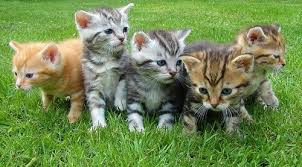

3. `Bounding Box`: imagine drawing a rectangle around an object in a photo to highlight it. That’s what a bounding box is—a rectangular box that surrounds an object to show where it is in the image. The box is defined by the coordinates of its top-left and bottom-right corners.

<img src="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-030-58548-8_24/MediaObjects/504439_1_En_24_Fig1_HTML.png" alt="Example Image" width="600">

4. `Class Label`: once an object is found, we need to identify what it is. The class label is the name we give to the object, like "car," "dog," or "duck." Object detection models predict both the location of the object and its class label.

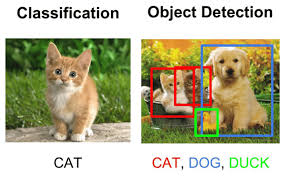

5. `Confidence Score`: it is a measure of how certain the model is about its prediction. It’s like the model saying, “I’m 90% sure this object is a car.” A higher score means the model is more confident in its prediction.

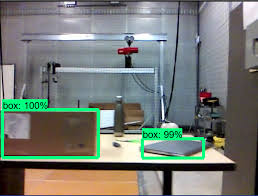

6. `Intersection over Union (IoU)`: it is a way to check how well the model’s predicted bounding box matches the actual object in the image. It compares the area of overlap between the predicted box and the real box (ground truth) to the area covered by both boxes combined. The closer the IoU is to 1, the better the match.

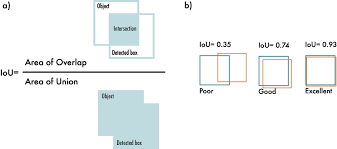

7. `Ground Truth`: it refers to the accurate, manually labeled data that we use to evaluate how well the model is performing. In object detection, this means the actual bounding boxes and class labels that have been identified by a human annotator.

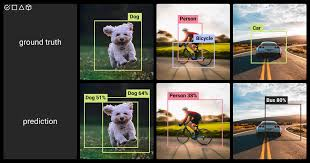

8. `Anchor Boxes`: they are like templates for bounding boxes that help the model predict objects of different sizes and shapes more efficiently. They give the model a head start by providing pre-defined shapes and sizes to match against the objects in the image.

<img src="https://i.ytimg.com/vi/RTlwl2bv0Tg/hqdefault.jpg" alt="Example Image" width="400">

9. `Non-Maximum Suppression (NMS)`: sometimes, the model might detect the same object multiple times with slightly different bounding boxes. NMS is a technique to clean this up by keeping only the box with the highest confidence score and removing the others, ensuring we don’t end up with duplicate detections.

<img src="https://media.licdn.com/dms/image/D4D12AQHRMh0c5QaVBw/article-cover_image-shrink_600_2000/0/1716188730720?e=2147483647&v=beta&t=jdlzTXjxMVKr__2s2_IrVRdsOozoAY6RALFJQwq5pXw" alt="Example Image" width="600">

10. `Region of Interest (ROI)`: instead of analyzing the entire image at once, the model often focuses on specific areas called Regions of Interest (ROIs). These are parts of the image where the model thinks an object might be, making the search more efficient.

<img src="https://www.researchgate.net/publication/319015293/figure/fig3/AS:961824396693522@1606328214972/Region-of-Interest-ROI-and-Region-of-Non-Interest-RONI-of-medical-image.gif" alt="Example Image" width="600">

11. `Feature Maps`: as the image passes through a neural network, it gets transformed into a feature map. This is like a condensed version of the image, highlighting important details like edges, textures, and patterns that help the model recognize objects.

<img src="https://www.researchgate.net/publication/378720899/figure/fig6/AS:11431281228870254@1710270628809/The-visualization-of-YOLOv8n-CTAM-a1-a2-display-the-raw-image-and-detection-results.tif" alt="Example Image" width="400">

## [2. Recognition of `Semantic Category`.]()

Now that we've covered the basics of `object detection`, let's dive deeper into the process of recognizing the semantic category of objects in an image. **This process involves identifying what the object is (e.g., car, dog, person) and is central to `object detection`**. We’ll also explore the unique challenges faced in this task and how different object detection methods address them.

#### **Additional Challenges in `Object Detection` Compared to `Image Classification`**.
The truth is tha `OD` is more complex tash compared to `IC` and here is why:
1. `Multiple Objects`: unlike image classification, where the task is to identify a single object in an image, object detection must handle multiple objects, potentially of different categories, within the same image.
2. `Object Location`: object detection isn’t just about recognizing objects; it’s also about pinpointing their exact location using bounding boxes.
3. `Varied Object Sizes`: objects can appear in different sizes, depending on their distance from the camera or their actual size in the real world.
4. `Occlusion`: sometimes, objects are partially hidden behind others, making it harder to detect and recognize them accurately.

#### **Defining `Semantic Category` Recognition**.
Recognition of `semantic categories` in `OD` **refers to the model's ability to *identify* and *label* the objects in an image**.
- For example, if there’s a dog and a car in an image, the model should recognize and label them as “dog” and “car” respectively.

#### **Real-World Explanation**.
Imagine you’re in a room with various items scattered around—like a chair, a book, and a cup. If someone asked you to identify what’s in the room, you wouldn’t just say “objects.” Instead, you’d specify, “There’s a chair, a book, and a cup.” This process of naming and categorizing each item is similar to what an object detection model does when recognizing semantic categories.

#### **Dealing with a Variable Number of Objects**.
One of the ***trickiest*** aspects of this task is that the number of objects in an image isn’t fixed. **An image could have just one object or many**. The model must be able to adapt and accurately detect all objects, regardless of their number.

#### **Handling Variations in Object Size**.
Objects can appear in different sizes **depending on their distance from the camera**. For instance, a car far away looks much smaller than one close up. The model needs to recognize that both are cars, despite their size differences. This requires the model to be flexible and robust in detecting objects of varying scales.

#### *Evaluating Algorithm Performance**.
Evaluating how well an object detection algorithm performs is crucial. This is where metrics like `Intersection over Union` (`IoU`) come into play.

- `IoU Metric`: `IoU` is a common evaluation metric **that measures how well the predicted bounding box matches the actual bounding box of an object**.
- The closer the `IoU` score is to `1`, the better the prediction.

Imagine you have two boxes—one predicted by the model and one that's the ground truth. **`IoU` calculates the overlap between these two boxes divided by the total area covered by both**.


### `Object Detection` Methods: `Single-Stage` vs `Two-Stage`.
`OD` methods can be broadly categorized into two types based on how they process images:

#### **`Single-Stage` Methods.**
In `single-stage` methods, **the model predicts the bounding boxes and class labels in one go**. This approach is faster and simpler, making it ideal for real-time applications.

- `Example`: A popular `single-stage` detector is [`YOLO` (`You Only Look Once`)](https://www.v7labs.com/blog/yolo-object-detection), **which processes the entire image at once and makes predictions**.

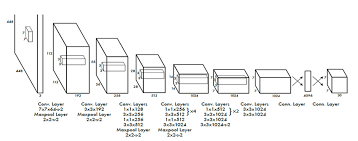

<img src="https://www.labellerr.com/blog/content/images/2023/01/yolo-algorithm-1.webp" alt="Example Image" width="600">

- `Pros`: Faster, suitable for real-time detection.
- `Cons`: May not be as accurate as two-stage methods, especially for detecting smaller objects.

#### **`Two-Stage` Methods.**
In `two-stage` methods, the process is divided into two steps:
1. First, the model generates a set of potential bounding boxes, called `region proposals`.
2. Then, in the second stage, it refines these proposals and classifies the objects within them.

- `Example`: [`Faster R-CNN`](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://blog.paperspace.com/faster-r-cnn-explained-object-detection/&ved=2ahUKEwiKudzYv_uHAxUB0gIHHX3SLEQQFnoECCMQAw&usg=AOvVaw2WGWkZRNTjIDGCBva8LVz9) is a well-known `two-stage` detector. **In the first stage, it identifies regions of interest**, and in the second, **it zooms in on these regions to classify the objects**.

<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-24_at_5.10.31_PM.png" alt="Example Image" width="600">

<img src="https://miro.medium.com/v2/resize:fit:1095/1*jYDMaYeH-TrcoofDqCdxug.jpeg" alt="Example Image" width="600">

#### **Difference Between `Single-Stage` and `Two-Stage`**.
The main difference between `single-stage` and `two-stage `object detection` methods **lies in their approach**:
- `Single-Stage`: Everything happens ***At Once***, which makes it faster but potentially less precise.
- `Two-Stage`: ***Takes a more careful***, two-step approach, resulting in higher accuracy but at the cost of speed.

Read [this](https://www.researchgate.net/publication/358362847_A_Survey_of_Deep_Learning-Based_Object_Detection_Methods_and_Datasets_for_Overhead_Imagery) Comperhesive comparative review if you want to learn more about the different OD methodologies


### A Small Recap for this section.
In this section, we've delved into the process of recognizing semantic categories in object detection, discussed the additional challenges relative to image classification, and explored the different methods used to tackle these challenges. Whether using a `single-stage` or `two-stage` method, **the goal remains the same: accurately detect and classify objects within an image, regardless of their number, size, or position.**

## [3. The Metholodogy of Object Detection *(a `step-by-step` guide)*.]()

Now that we’ve covered the basics of `object detection` and the process of recognizing `semantic categories`, let’s dive into the **actual methodology** used in `OD`.

This section will guide you through each step involved in detecting objects within an image, using practical examples and addressing some of the algorithmic challenges that arise.\

### `Step-by-step` process of `OD`.
Object detection follows a series of steps that allow models to accurately identify and locate objects within images. Here, in this section we will not only talk about for the four basic steps that we analyzed previously, but we will also cover the entire process. So, Let's dive into it!

1. `Image Input`: the process begins with an image input. This is the image in which we want to detect objects.
2. `Feature Extraction`: the model extracts features from the image using a convolutional neural network (CNN). These features help the model understand the content of the image, such as edges, textures, shapes, and more complex patterns.
3. `Region Proposal` (for `Two-Stage` Methods): in `two-stage` methods, the next step is to generate region proposals. These are potential bounding boxes where the model thinks an object might be located. This step is skipped in `single-stage` methods, where bounding boxes and class predictions are made simultaneously.
4. `Classification` and `Localization`: the model then classifies the objects in each proposed region (or directly in the entire image for single-stage methods) and predicts the bounding box coordinates that surround each object.
5. `Bounding Box Refinement`: after the initial bounding boxes are predicted, they might be refined to better fit the objects they surround. This is especially important in two-stage methods.
6. `Non-Maximum Suppression (NMS)`: in cases where multiple bounding boxes overlap, non-maximum suppression is used to keep only the most accurate box and discard the others. This step ensures that we don’t have duplicate detections for the same object.
`Output`: The final step is producing the output, which includes the class label (what the object is) and the bounding box coordinates (where the object is located) for each detected object.

#### **A Practical Example: Detecting Vehicles in an Image.**
Let’s consider a practical example. Imagine you’re trying to detect different vehicles in a street scene. The process would look something like this:

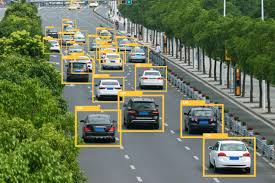

1. `Input Image`: you provide the model with an image of a busy street.
2. `Feature Extraction`: the model processes the image and extracts features like the shapes of cars, trucks, and motorcycles.
3. `Region Proposal`: if using a `two-stage` method, the model generates several proposals for where it thinks vehicles might be located.
4. `Classification` and `Localization`: the model identifies and classifies each vehicle (e.g., car, truck) and predicts the bounding boxes around them.
5. `Bounding Box Refinement`: the model adjusts the boxes to ensure they tightly fit around each vehicle.
6. `Non-Maximum Suppression`: if there are overlapping boxes around the same vehicle, the model keeps only the best one.
7. `Output`: the model outputs the final list of detected vehicles, each with a bounding box and a label.

#### **Algorithmic Challenges in `Object Detection`.**
`Object Detection` is not without its challenges. Here are some key issues that models must handle:

- `Multiple Outputs`: the model needs to predict multiple objects in an image, each with its own `bounding box` and `label`. This is more complex than `image classification`, which only predicts a single `label`.
- `Multiple Types of Outputs`: the model must predict both what the object is (its `lass label`) and where it is (its bounding box). These are two different types of outputs that the model must handle simultaneously.
- `Large Images`: handling large images can be computationally expensive, and the model must efficiently process them without missing small objects or important details.

### `Bounding Boxes`: A Deeper Dive.

`Bounding boxes` are at the heart of object detection. Let’s take a closer look at what they are and how they work.

- `Definition`: a `bounding box` is a rectangular box that surrounds an object in an image, defined by its top-left and bottom-right corners.
- `What They Are`: `bounding boxes` are used to locate objects within an image. They tell us where the object is, but not necessarily what it is.
- `How They Work`: the model predicts the coordinates of the bounding box for each detected object. These coordinates are used to draw the box around the object.
- `How They Are Implemented`: during training, the model learns to predict `bounding boxes` by minimizing the difference between the predicted boxes and the `ground truth` boxes (the actual boxes provided in the labeled dataset).
- `When & Where`: `bounding boxes` are used in every step of object detection, from region proposal to final output.
- `Comparison of Bounding Boxes`: when multiple `bounding boxes` overlap, the model uses metrics like `IoU` (`Intersection over Union`) to decide which box is the most accurate.

### `IoU` Metric -- `Intersection-over-Union`:
- `Definition`: `IoU` measures the overlap between two `bounding boxes`—**one `predicted` and one `ground truth`**. It is calculated as the area of overlap divided by the area of union between the two boxes.
- `How It Works`: a higher `IoU score` indicates better overlap, and hence a better prediction. `IoU` is crucial for evaluating model performance.
- `Value Evaluation`: `IoU` is typically used to determine if a predicted bounding box is accurate enough. For example, an `IoU` of `0.5` or higher is often considered a correct detection.

### Detection of a **Single Object**.

<img src="https://i.pinimg.com/736x/4d/1f/9b/4d1f9b3e6da6a7fc2406a1c0182f0709.jpg" alt="Example Image" width="600">

#### **When detecting a single object:**
- `Definition`: The process of identifying and locating just one object in an image.
- `Step-by-Step Process`:
    1. The model processes the image.
    2. It predicts a bounding box around the single object.
    3. It classifies the object within the box.
    4. The final output is the object’s class and its location.

### Detection of **Multiple Objects**.

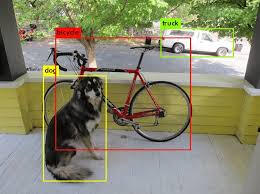

#### **When detecting multiple objects:**
- `Definition`: The process of identifying and locating more than one object in an image.
#### **`Sliding Window` Method:**

<img src="https://www.researchgate.net/publication/338903067/figure/fig5/AS:11431281211614037@1702455975749/Sliding-window-method-used-for-data-preprocessing-512512-pixel-moving-window-slides.tif" alt="Example Image" width="600">

- `Definition`: a technique where a window of fixed size slides over the image to detect objects.
- `Step-by-Step Process`:
    1. A window scans the image in a grid-like pattern.
    2. At each step, the model checks if an object is present in the window.
    3. If an object is detected, its class and bounding box are predicted.
- `Simple Explained Example`: Imagine scanning a book line by line. As you move the scanner, you identify words (objects) at each position. Similarly, the `sliding window` method moves across the image to find objects.

> *Read more about the **sliding window** teqnique in [this](https://medium.com/@rajshekhar_k/object-detection-series-3-0-basic-of-object-detection-196d91550671) article.*

### What we have learned so far.
In this section, we've explored the methodology of object detection, covering everything from the initial input of an image to the final output of detected objects. We’ve also delved into the challenges that come with this process, particularly when handling multiple objects and various output types. Finally, we've taken a closer look at `bounding boxes`, including how they work and why they are essential to `object detection`.

With this understanding, you're now equipped to explore more advanced object detection methods, like `R-CNN` and `RetinaNet`, which we'll cover in the following sections.

## [4. The `R-CNN` Method (`Region-Based CNN`).]()

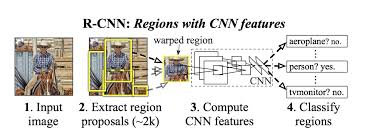

`R-CNN`, or `Region-Based Convolutional Neural Network`, is an object detection method that **uses regions proposed within an image to predict both the location and classification of objects**. It’s one of the pioneering methods that shifted object detection from traditional techniques to deep learning-based approaches.

#### **Simple Explanation.**
In simple terms, `R-CNN` works by **first identifying possible regions in an image where an object might be located**. These regions are then individually processed by a convolutional neural network (`CNN`) to classify what’s inside each region and to refine the exact location of the object by adjusting the bounding box. The strength of `R-CNN` lies in its ability to leverage the powerful feature extraction capabilities of `CNNs`, making object detection more accurate.

#### **General Architecture.**

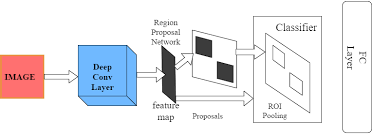

*This image illustrates the `Faster R-CNN model`. You can read more about it [here](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://roboflow.com/model/faster-r-cnn&ved=2ahUKEwimo67mo5uJAxXPSPEDHTLaAs0QFnoECEAQAQ&usg=AOvVaw2Yvr8x-jMBsUCkrtALM7Vt) and if you want to, you can read the full paper by following [this](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://arxiv.org/abs/1506.01497&ved=2ahUKEwjrms37o5uJAxWbVPEDHdHjJWYQFnoECBYQAQ&usg=AOvVaw0-h3L5HnQUvAcH_OB3IHm9) link.*

The architecture of `R-CNN` involves several key components:
1. `Region Proposal`: the first step in `R-CNN `is to generate region proposals, which are potential areas in the image where objects might be located. These proposals are typically generated using an algorithm like Selective Search, which quickly identifies these candidate regions.
2. `Feature Extraction`: Each of these region proposals is then passed through a `CNN`. The `CNN` extracts features from these regions, which are then used to classify the object and predict the bounding box coordinates. The `CNN` used in this stage is usually pre-trained on a large dataset like `ImageNet`.
3. `Classification` and `Regression`: Once the features are extracted, they are fed into a classifier (often a support vector machine, or `SVM`) to determine the class of the object. Simultaneously, a regression model is used to refine the `bounding box`, ensuring it accurately surrounds the object.
4. `Non-Maximum Suppressio`n: After classification and regression, `R-CNN` applies `non-maximum suppression` to eliminate redundant bounding boxes and keep only the most accurate predictions.

#### **How it works?**
Let’s break down the `R-CNN` process:
1. `Region Proposal`: the image is first analyzed to identify regions that are likely to contain objects. These regions are proposed based on their potential to include something of interest.
2. `Feature Extraction`: each proposed region is resized to a fixed size (e.g., `224 x 224` pixels) and passed through a `CNN`. The `CNN` extracts features that represent the content of each region.
3. `Classification`: the extracted features are then classified into object categories (e.g., cat, dog, car) using a classifier like `SVM`.
4. `Bounding Box Regression`: alongside classification, the method predicts adjustments to the initial bounding boxes, refining their positions to better fit the objects.
5. `Final Output`: the final output consists of the class labels for the detected objects and their corresponding bounding boxes.

#### **Classification and Categorization Criteria.**

- `Positive Examples`: region proposals that have a high overlap with the ground truth bounding boxes (usually with an IoU above a certain threshold, like 0.5) are considered positive examples. These regions are likely to contain objects.
- `Negative Examples`: region proposals with low overlap (`IoU` below the threshold) are considered negative examples. These regions typically contain background or irrelevant content.

#### **Predictions for Positive and Negative Areas.**
- `Positive Areas`: for regions classified as positive, the model predicts both the class of the object and refines the bounding box to better fit the object.
- `Negative Areas`: for negative regions, the model is trained to correctly identify them as non-object regions, reducing false positives.

#### **Execution Stage.**
In the execution stage, `R-CNN` goes through the following steps:
1. `Input Image`: the process begins with an image input.
2. `Region Proposal`: potential object regions are identified using Selective Search or similar algorithms.
3. `CNN Feature Extraction`: each region is resized and passed through a pre-trained CNN to extract features.
4. `Classification and Regression`: the features are classified into object categories, and the `bounding boxes` are refined.
5. `Non-Maximum Suppression`: Redundant `bounding boxes` are removed, keeping the most confident predictions.
6. `Output`: The final output includes the detected objects and their bounding boxes.

#### **Problems.**

Some of the issues with `R-CNN `include:

- `High Computational Cost`.
    - The need to pass each region proposal through a `CNN` makes `R-CNN `slow and computationally expensive.
- `Storage Requirements`:
    - Storing features for each region proposal requires significant memory.
- `Training Complexity`:
    - `R-CNN` involves training three different models separately (the `CNN`, the `SVM`, and the `regressor`), making it complex to implement and `fine-tune`.

#### **Overlapping Boxes.**
- `Definition`: `overlapping boxes` occur when multiple region proposals cover the same object or closely situated objects. This can result in multiple detections of the same object.
- `Handling Overlapping Boxes`: `R-CNN` handles overlapping boxes through non-maximum suppression (`NMS`), which keeps the most confident prediction and discards the others. This ensures that each object is detected only once, preventing duplicate detections.
- `Total Explanation`:
    - `Overlapping boxes` are a common challenge in object detection.
    - Without addressing them, the model might produce redundant results, which could lower performance metrics like precision.
    - `Non-maximum suppression` is the key technique used to manage `overlapping boxes`, ensuring that only the most accurate and relevant detections are retained.


> **📚 Further reading:**
> 1. [What is R-CNN?](https://blog.roboflow.com/what-is-r-cnn/).
> 2. [d2ai: 14.8. Region-based CNNs (R-CNNs)](http://d2l.ai/chapter_computer-vision/rcnn.html).

## [5. `RetinaNet`.]()

<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-07_at_4.22.37_PM.png" alt="Example Image" width="600" height="300">

`RetinaNet` is an object detection model that introduced a novel loss function called *`Focal Loss`* **to address the class imbalance issue in object detection**, ***particularly when detecting smaller or less frequent objects in an image.*** It is a `single-stage` detector, meaning it predicts object locations and classifications directly from the input image in one step, rather than using a separate region proposal stage like in `two-stage` detectors such as `R-CNN`.

#### **Single-Stage Detector.**

- `Basic Operation`:
    - In `object detection`, a `single-stage detector` directly predicts the object classes and bounding boxes from the input image in one go.
    - Unlike `two-stage` detectors, which first generate region proposals and then classify them, `single-stage` detectors are faster because they skip the region proposal step.
    - However, they often suffer from lower accuracy, particularly when it comes to detecting small or less frequent objects.
    - `RetinaNet` addresses this challenge by introducing `Focal Loss`, which down-weights the loss assigned to well-classified examples, allowing the model to focus more on hard-to-classify cases.

#### **Functional Costs for Class Imbalance.**
`Class imbalance` **is a significant issue in object detection, especially when the number of background pixels vastly exceeds the number of pixels belonging to objects.** This imbalance can lead to models that are biased towards predicting the background, as it dominates the dataset.

`RetinaNet` tackles this problem using `Focal Loss`, which reduces the impact of easy-to-classify examples (like background) on the training process. This allows the model to focus more on the harder-to-classify examples, such as objects that are small, occluded, or rare.

#### **Simple Explanation.**
`RetinaNet` simplifies `object detection` **by doing everything in a single pass through the network**. Instead of first proposing regions and then classifying them, **it predicts both the object classes and their locations simultaneously**. The ***key innovation** of `RetinaNe`t is the `Focal Loss`, which helps the model deal with the imbalance between the numerous background examples and the relatively few object examples by penalizing easy examples less during training. This makes `RetinaNet` both fast and more accurate, especially for challenging detections.

#### **General Architecture**.

<img src="https://www.researchgate.net/publication/348359261/figure/fig1/AS:978231377264640@1610239943600/The-architecture-of-the-proposed-model-R-RetinaNet.png" alt="Example Image" width="600">

`RetinaNet`’s architecture can be broken down into the following components:
1. `Backbone Network`: this is typically a deep convolutional neural network like `ResNe`t, used to extract features from the input image. The `backbone` network generates a feature map that represents different levels of abstraction from the input image.
2. `Feature Pyramid Network (FPN)`: `RetinaNet` uses an `FPN` on top of the `backbone` ***network to create a multi-scale feature pyramid**.
    - This allows the model to detect objects of various sizes by analyzing the image at different scales.
    - The `FPN` takes the `feature maps` from the `backbone` at different levels and combines them to produce a set of feature maps at multiple scales.
3. `Classification Subnet`: this subnet is applied to each level of the `feature pyramid` to predict the probability of each object class at each location in the image. The subnet outputs a set of class probabilities for every `anchor box` at each location in the `feature maps`.
4. `Box Regression Subnet`: this subnet is responsible for predicting the coordinates of the `bounding boxes` for each `anchor box.` It outputs a set of adjustments (`offsets`) to the predefined anchor boxes to better fit the detected objects.
5. `Focal Loss`: this is used during training to address the class imbalance by focusing more on hard-to-classify examples and reducing the loss contribution from easy examples, particularly the background.

#### **How It Works?**
1. `Input Image Processing`: the image is passed through the backbone network, such as `ResNet`, to extract feature maps. These feature maps capture different aspects of the image, from low-level details like edges to high-level semantic features.
2. `Feature Pyramid Network`: the feature maps from different layers of the backbone are combined to create a pyramid of features. Each level of the pyramid corresponds to a different scale, allowing the model to detect objects of varying sizes.
3. `Prediction Subnets`:
   - The classification subnet takes the multi-scale feature maps and predicts the probability of each object class at every location.
   - The `box regression subnet` predicts the `bounding box` coordinates for objects at each location. These predictions are adjustments to predefined anchor boxes, which act as reference points for detecting objects.
4. Focal Loss in Training`: during training, the `Focal Loss` function is applied. This loss function gives more weight to hard-to-classify examples (like small or infrequent objects) and less weight to easy examples (like large, easily recognizable objects or background).
5. `Final Output`: during inference, the model outputs a set of class probabilities and `bounding box` coordinates for each anchor box. Post-processing steps, like `non-maximum suppression` (`NMS`), are applied to remove redundant detections and refine the final set of detected objects.

#### **The Whole Algorithm `Step-by-Step` Simply Explained in Depth**
1. `Backbone Network`: the input image is passed through a backbone `CNN` like `ResNet` to produce feature maps. These maps contain rich information about the objects in the image.
2. `Feature Pyramid Network` (`FPN)`: the FPN takes these feature maps and creates a multi-scale representation. This allows the model to handle objects of different sizes by analyzing the image at different levels of detail.
3. `Anchor Boxes`: at each level of the pyramid, predefined` anchor boxes` of different sizes and aspect ratios are placed across the image. These anchors act as reference points for detecting objects.
4. `Classification and Regression`: Two `subnets` (`classification` and `regression`) are applied to each `feature map`.
    - The `classification subnet` predicts the likelihood of each `object class` at each `anchor box`,
    - while the `regression subnet` predicts the `precise location of the object` by adjusting the `anchor box` coordinates.
5. `Focal Loss`: the `Focal Loss` function is used during training to address the class imbalance. It ensures that the model focuses more on difficult examples and less on the abundant easy ones, improving the detection of small and rare objects.
6. `Post-Processing`: after the predictions are made, `non-maximum suppression` (`NMS`) is applied to remove duplicate detections and keep only the most confident predictions. The final output is a set of bounding boxes and class labels for the detected objects.


## [6. `FCOS` Method.]()

<img src="https://www.researchgate.net/publication/360936600/figure/fig1/AS:1161273970573312@1653880698349/Overall-architecture-The-overall-architecture-of-FCOS-LiDAR-resembles-the-2D-imagebased.png" alt="Example Image" width="600">

`FCOS` (`Fully Convolutional One-Stage Object Detection`) is a modern `object detection` method that **eliminates the need for `anchor boxes`**, which are traditionally used in many `OD` models. **Instead of relying on predefined regions (anchor boxes), `FCOS` directly predicts the `location`, `size`, and `class` of objects at each pixel location in a `feature map`, making it an *anchor-free* approach**.

#### **`Single-Stage` Detector.**
As a `single-stage` detector, `FCOS` **predicts the object class and its `bounding box` in one `forward pass` of the network, making it fast and efficient**. Unlike `two-stage` detectors like R`-CNN` that first generate region proposals and then classify them, `FCOS` directly performs both tasks, which simplifies the process and speeds up detection.

#### **Tracker Without *'Area Suggestions'*.**
In traditional `object detection` models, `anchor boxes` **serve as "area suggestions," which guide the model on where to look for objects**. `FCOS` does away with these `anchor boxes` entirely. Instead, it uses every pixel in the `feature map` as a potential location for detecting an object. This means that each pixel in the map predicts whether it belongs to an object, what `class` the object is, and where its `bounding box` is.

#### **Basic Operation.**
1. `Feature Extraction`: the image is passed through a `backbone` network (like `ResNet`) to extract a `feature map`, which is a lower-resolution, but richer, representation of the input image.
2. `Per-Pixel Predictions`: instead of using `anchor boxes`, `FCOS` makes predictions for each pixel in the `feature map`. For each pixel, the model predicts:
    - Whether the pixel belongs to the center of an object.
    - The class of the object (if it exists).
    - The distance from the pixel to the four sides of the `bounding box` (top, bottom, left, and right).
3. `Bounding Box Formation`: these distances are then used to form a `bounding box` around the object.

#### **Functional Cost for Class Imbalance.**
Like other `object detection` models, `FCOS` must handle the problem of `class imbalance`—there are usually many more background pixels than object pixels. `FCOS `tackles this by assigning higher importance to pixels that are near the center of objects (where it's more likely to correctly predict the object) and reducing the importance of background pixels or those near the edges of objects.

#### **Simple Explanation.**
`FCOS` **simplifies the `object detection` process by eliminating the need for `anchor boxes`**. Every pixel in the `feature map` is treated as a potential object detector. The model predicts whether an object is present at each pixel, what the object is, and where its bounding box is located. This `anchor-free` approach is simpler and can be more efficient, particularly in complex scenes with multiple objects of different sizes.

#### **General Architecture.**

<img src="https://www.researchgate.net/publication/358913063/figure/fig3/AS:11431281211841815@1702494239751/The-architecture-of-FCOS-C-denotes-the-number-of-classes.tif" alt="Example Image" width="600">

The `FCOS` architecture consists of:
1. `Backbone Network`: typically a `CNN` like `ResNet`, which extracts hierarchical `feature maps` from the input image.      
    - These `feature maps` capture various levels of abstraction, from simple edges to complex patterns.
2. `Feature Pyramid Network` (`FPN`): like in `RetinaNet`, an `FPN` is often used to create a multi-scale feature pyramid, allowing the model to detect objects of different sizes. Each level of the pyramid corresponds to a different scale.
3. `Prediction Heads`: `FCOS` uses a series of `convolutional layers` (often called *"`heads`"*) applied to each `feature map` level. These `heads` predict:
    - `Classification`: the probability that an object of a certain class exists at each pixel.
    - `Center-ness`: a score indicating how close the pixel is to the center of an object, which helps in suppressing low-quality predictions.
    - `Regression`: the distances from the pixel to the four sides of the `bounding box`, which define the object’s exact location.
4. `Final Predictions`: The model outputs predictions for each pixel across the `feature maps`. `Non-maximum suppression` (`NMS`) is then applied to filter out redundant or low-quality predictions, leaving the most confident `bounding boxes` and class labels.

#### **How It Works?**
1. `Input Image Processing`: the input image is passed through a `backbone CNN` to generate `feature maps`, which are multi-scale representations of the image.
2. `Per-Pixel Predictions`: for each pixel in the `feature map`, `FCOS` predicts:
    - Whether the pixel belongs to an object’s center.
    - The class of the object.
    - The distances to the top, bottom, left, and right edges of the bounding box.
3. `Center-ness Scoring`: each pixel’s prediction is weighted by a "`center-ness`" score, which measures how close the pixel is to the center of an object. This helps reduce the impact of less accurate predictions from pixels near the edges of objects.
4. `Bounding Box Formation`: the distances predicted by the `regression head` are used to construct `bounding boxes` around detected objects.
5. `Post-Processing`: `non-maximum suppression` (`NMS`) is applied to the `bounding boxes` to `eliminate overlapping` or `redundant boxes`, leaving the most accurate predictions.

#### **The Whole Algorithm `Step-by-Step` Simply Explained in Depth.**
1. `Backbone Network`: the input image is processed by a `backbone network` like `ResNet` to produce `feature maps`, capturing different aspects of the image.
2. `Feature Pyramid Network (FPN)`: the `feature maps` are passed through an `FPN`, *which generates a `pyramid` of `feature maps` at multiple scales*. **This allows the detection of objects of various sizes.**
3. `Per-Pixel Classification and Regression`: each pixel in the `feature map` is used to predict the presence of an object. For each pixel, the model predicts:
    - The object class.
    - The distance to the top, bottom, left, and right edges of the bounding box.
    - A center-ness score to indicate how close the pixel is to the center of the object.
4. `Center-ness Score`: the predictions are weighted by the center-ness score, which helps prioritize pixels closer to the object’s center.
5. `Bounding Box Calculation`: the distances predicted by the `regression head` are combined to form `bounding boxes` around detected objects.
6. `Non-Maximum Suppression (NMS)`: `NMS` is applied to the `bounding boxes` to remove `overlapping` or less confident predictions, resulting in the final set of detected objects.


## [ 7. Fine-tuning a `Fast R-CNN` and use it to detect objects - An introductive tutorial in `PyTorch`.]()


> **Note.**

> ----
> The following code is based on an established example from the official `PyTorch` documentation, which has been widely adopted by the research community for training `object detection` and `segmentation models`.

> By utilizing this example, we can leverage proven techniques and methods, while focusing on understanding the underlying principles and mechanisms that govern the process.

> However, our approach goes beyond merely reproducing the example.
 - Our **goal** is to conduct an in-depth analysis of the code's functions and parameters, providing additional explanations and commentary where necessary.
 - Through this process, we **aim** to fully comprehend how the model operates, how to adapt it to different datasets, and ultimately, how to develop our own `object detection` and `segmentation` experiments tailored to our specific research needs.

> **Reminder.**

> ---
> This tutorial is designed to provide you with the foundational knowledge needed to understand the basic code for `object detection`. As an introduction to computer vision, the focus is more on grasping core principles, learning how to *'think in code'* and effectively using programming tools, rather than showcasing professional-level code. The **primary goal** here is not to cover every detail but to spark your interest, encouraging you to experiment on your own and explore further. This code serves as a starting point—a catalyst for deeper investigation and personal experimentation in the field of computer vision.


Read the original code [here](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html).


Alright, let’s dive deep into the code and unravel every single part of it, `step-by-step`, with the ultimate goal of making it crystal clear and easy to understand! We’re about to embark on an exciting journey, where we’ll break down each segment of the code, demystify its purpose, and explain it in the simplest terms possible. Get ready to explore, learn, and conquer every aspect of this code as we transform complex concepts into something totally accessible and downright fascinating! Let’s do this! 🚀

1. Downloading and Extractin. the Dataset.

In [ ]:
! wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data
! cd data && unzip PennFudanPed.zip

- This code downloads a `zip` file from a `URL` that contains the `PennFudanPed` dataset, then extracts the contents into a directory named data.
- The dataset contains images and corresponding `masks`, which we’ll use to train and evaluate our model. These images include pedestrians, and the `mask`s outline the pedestrians, helping the model learn what a pedestrian looks like.


2. Loading and Displaying an Image and its `Mask`.

In [ ]:
import matplotlib.pyplot as plt
from torchvision.io import read_image


image = read_image("data/PennFudanPed/PNGImages/FudanPed00046.png")
mask = read_image("data/PennFudanPed/PedMasks/FudanPed00046_mask.png")

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Image")
plt.imshow(image.permute(1, 2, 0))
plt.subplot(122)
plt.title("Mask")
plt.imshow(mask.permute(1, 2, 0))

- This code loads and displays an image from the dataset along with its corresponding `mask`.
- Visualizing the images and `masks` helps us understand what the model will be working with. The image shows the pedestrians, and the `mask` highlights the area where the pedestrians are located. This visualization is key to ensuring that the data is correct before training the model.

3. Loading and Modifying a `pre-trained` Model.

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

- This code loads a `pre-trained` `Faster R-CNN` model with a `ResNet-50` `backbone`, and then modifies it to predict only two classes: person and background.
- Using a `pre-trained` model helps save time and computational resources because the model has already learned to `detect objects` in images. However, since our task only requires detecting pedestrians, we modify the `final layer` to output just two classes. This customization is crucial for adapting the model to our specific task.

4. Creating a `Custom Dataset` Class.

In [ ]:
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = read_image(img_path)
        mask = read_image(mask_path)
        # instances are encoded as different colors
        obj_ids = torch.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]
        num_objs = len(obj_ids)

        # split the color-encoded mask into a set
        # of binary masks
        masks = (mask == obj_ids[:, None, None]).to(dtype=torch.uint8)

        # get bounding box coordinates for each mask
        boxes = masks_to_boxes(masks)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=F.get_size(img))
        target["masks"] = tv_tensors.Mask(masks)
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

- This code defines a `custom dataset` class called `PennFudanDataset`. It loads images and their corresponding masks, processes them into a format that the model can understand, and returns them when requested.
- `Custom datasets` are essential when working with data that doesn't fit into predefined formats. This class does several things:
    1. `Loads images and masks`: It retrieves the images and corresponding masks.
    2. `Extracts objects`: It identifies the individual pedestrians in the masks by looking for unique identifiers.
    3. `Creates bounding boxes`: It generates bounding boxes around each pedestrian.
    4. `Returns data in the right format`: It ensures that the data is returned in a way the model expects (images, bounding boxes, labels, etc.).

This class acts as the intermediary that ensures the data is correctly fed into the model for training and evaluation.

5. Creating a Custom `Faster R-CNN` Model.

In [ ]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return
# only the features
backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
# ``FasterRCNN`` needs to know the number of
# output channels in a backbone. For mobilenet_v2, it's 1280
# so we need to add it here
backbone.out_channels = 1280

# let's make the RPN generate 5 x 3 anchors per spatial
# location, with 5 different sizes and 3 different aspect
# ratios. We have a Tuple[Tuple[int]] because each feature
# map could potentially have different sizes and
# aspect ratios
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),
    aspect_ratios=((0.5, 1.0, 2.0),)
)

# let's define what are the feature maps that we will
# use to perform the region of interest cropping, as well as
# the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to
# be [0]. More generally, the backbone should return an
# ``OrderedDict[Tensor]``, and in ``featmap_names`` you can choose which
# feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(
    featmap_names=['0'],
    output_size=7,
    sampling_ratio=2
)

# put the pieces together inside a Faster-RCNN model
model = FasterRCNN(
    backbone,
    num_classes=2,
    rpn_anchor_generator=anchor_generator,
    box_roi_pool=roi_pooler
)

- This code constructs a custom `Faster R-CNN` model using a `MobileNetV2` `backbone` and custom settings for anchor boxes and `RoI` pooling.
- While the `pre-trained` model is useful, sometimes we need a model tailored to our specific requirements. In this case:
    1. `Backbone`: `MobileNetV2` is chosen for its balance between performance and efficiency.
    2. `Anchor Generator`: The `anchor boxes` are configured to `detect` objects of various sizes and aspect ratios.
    3. `RoI Pooling`: This layer ensures that the features extracted from the image can be efficiently processed regardless of the size of the detected objects.

This customized model is designed to be faster and more suitable for mobile or resource-constrained environments.

6. Building an `Instance Segmentation` Model.

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

- This function creates an `instance segmentation` model based on `Mask R-CNN`, which is capable of detecting objects and creating masks that outline each object in the image.
- `Instance segmentation` goes beyond simply identifying the presence of objects; it also precisely outlines them. By modifying the `pre-trained` `Mask R-CNN model`, we customize it to detect the specific classes we care about (in this case, pedestrians). This function gives us a powerful tool to both detect and segment objects in images.

7. Downloading Utility Scripts.

In [ ]:
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

0

- This code downloads several `utility scripts` from the `PyTorch` `GitHub` repository.
- These `scripts` include functions that handle training, evaluation, and data transformations. By using these utilities, we avoid having to write a lot of boilerplate code from scratch, allowing us to focus on the core functionality of our project.

8. Training and Evaluating the Model.

In [ ]:
from torchvision.transforms import v2 as T


def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

- This code demonstrates how to set up a series of transformations to preprocess images for training or evaluation, which is vital for improving model performance through data augmentation and normalization.
-  The `get_transform` function configures a series of image t`ransformations`. For training, it includes a `random horizontal flip` to augment the data, while for both training and evaluation, it converts images to floating-point tensors and normalizes them.
- The function returns a composed pipeline of these transformations using `T.Compose`, ensuring that images are consistently preprocessed before being fed into the model, enhancing both the robustness and effectiveness of the training process.

9. Loading the Model and Data, Training and Inference.

In [ ]:
import utils

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

# For Training
images, targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)  # Returns predictions
print(predictions[0])

{'loss_classifier': tensor(0.2016, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0361, grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0392, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0046, grad_fn=<DivBackward0>)}
{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}


- This part of the code involves setting up a `pre-trained` `Faster R-CNN` model and preparing a `custom dataset` for training. The dataset is loaded and batched using a `DataLoader`, and then the model is run through both training and inference processes. Training involves calculating losses on a batch of data, while inference tests the model's ability to make predictions on new, unseen images.

- Let's brake down the `key steps` of the whole process:
    1. `Model Initialization`: The `Faster R-CNN` model, `pre-trained` on the `COCO` dataset, is loaded with a `ResNet-50` `backbone`, providing a strong baseline for `object detection` tasks.
    2. `Data Preparation`: The `PennFudanDataset` is loaded, and a `DataLoader` is configured to `batch` and `shuffle` the data, preparing it for model consumption.
    3. `Training Process`: A single `batch` of images and targets is fed into the model, which returns both the `predictions` and the `training losses`, essential for `backpropagation`.
    4. `Inference`: The model is set to evaluation mode, where it predicts `bounding boxes` and `labels` for new images, demonstrating its ability to generalize to unseen data.

10. Model Setup, Training, and Evaluation.

In [ ]:
from engine import train_one_epoch, evaluate

# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2
# use our dataset and defined transformations
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
dataset_test = PennFudanDataset('data/PennFudanPed', get_transform(train=False))

# split the dataset in train and test set
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=1,
    shuffle=False,
    collate_fn=utils.collate_fn
)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

# let's train it just for 2 epochs
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

print("That's it!")

- This section focuses on preparing the environment and configurations needed to train a `custom object detection` model. The `dataset` is split into training and testing sets, and the model is transferred to the appropriate device (`GPU` or `CPU`). The code then sets up an `optimizer` and `learning rate scheduler` before training the model over a few `epochs`, with periodic evaluations to track performance and adjust the `learning rate` as needed.

- The `key steps` are the following:
    1. `Device Configuration`: The code checks for `GPU` availability and sets it as the processing `device`, which is crucial for speeding up the training process.
    2. `Dataset Splitting`: The `dataset` is randomly split into training and testing subsets, ensuring that the model is evaluated on unseen data, which is vital for assessing performance.
    3. `Model and Optimizer Setup`: The model is moved to the appropriate `device`, and an `optimizer` with `learning rate scheduling` is set up to manage weight updates during training.
    4. `Training Loop`: The model is trained over a specified number of `epochs`, with periodic evaluations on the `test set`, allowing for the monitoring of both training progress and model performance.

11. Visualizing the Results.

In [ ]:
import matplotlib.pyplot as plt

from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks


image = read_image("data/PennFudanPed/PNGImages/FudanPed00046.png")
eval_transform = get_transform(train=False)

model.eval()
with torch.no_grad():
    x = eval_transform(image)
    # convert RGBA -> RGB and move to device
    x = x[:3, ...].to(device)
    predictions = model([x, ])
    pred = predictions[0]


image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
image = image[:3, ...]
pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
pred_boxes = pred["boxes"].long()
output_image = draw_bounding_boxes(image, pred_boxes, pred_labels, colors="red")

masks = (pred["masks"] > 0.7).squeeze(1)
output_image = draw_segmentation_masks(output_image, masks, alpha=0.5, colors="blue")


plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))

- This code visualizes the predictions made by the model on a specific image. It draws bounding boxes and segmentation masks where the model thinks pedestrians are located.
- Visualization is critical for interpreting the model's performance. Seeing where the model places `bounding boxes` and masks allows us to qualitatively assess its accuracy. If the `boxes` and `masks` align well with the actual pedestrians, it’s a good sign that the model is performing well.

## [8. Overall Sum Up and further explanation]().
In this tutorial, we explored the exciting world of `object detection`, starting with fundamental concepts and progressing through advanced methodologies. 🌟 We began with an introduction to object detection, highlighting how `R-CNN` and its successors like `Faster R-CNN` have transformed the way we identify and classify objects in images. 📸 Moving forward, we discussed modern approaches such as `RetinaNet` and `FCOS`, which address challenges like class imbalance and streamline the detection process with innovative solutions. 🚀 By `fine-tuning` a pretrained `Faster R-CNN` model with P`yTorch`, we demonstrated how to adapt a powerful, general-purpose detector to specific datasets, showcasing practical steps for model customization, training, and evaluation. 🔍

With the insights gained, you’re well-equipped to tackle a range of object detection challenges. 💡 Whether you're developing real-time systems that need rapid inference or working on projects with diverse object classes, this foundation will prove invaluable. As you dive deeper, stay tuned to advancements in model efficiency and generalization to keep your solutions cutting-edge. 🌐 This journey through object detection not only enhances your technical skills but also prepares you to push the boundaries of computer vision. 🚀💥